
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

Missing Values:

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Statistical Summary:

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.

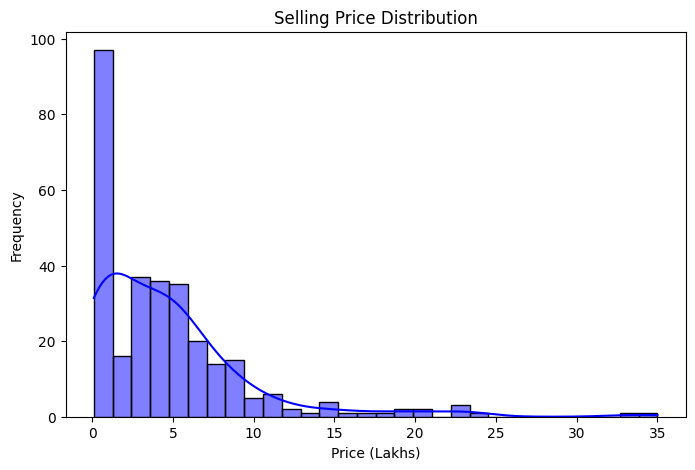

<ipython-input-13-1daaea8c3405>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Fuel_Type'], palette='pastel')


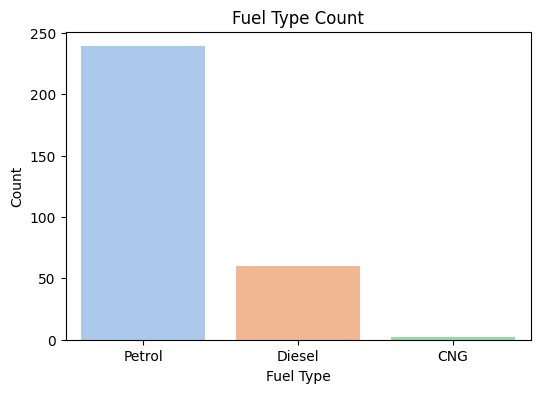

<ipython-input-13-1daaea8c3405>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Transmission'], y=df['Selling_Price'], palette='coolwarm')


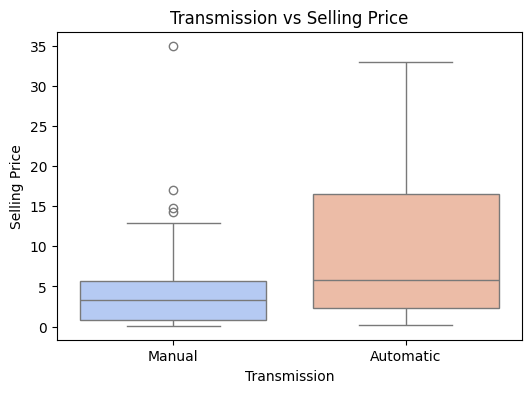

Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
Car_Age            int64
dtype: object
Selling_Price    0
Present_Price    0
Driven_kms       0
Owner            0
Car_Age          0
dtype: int64


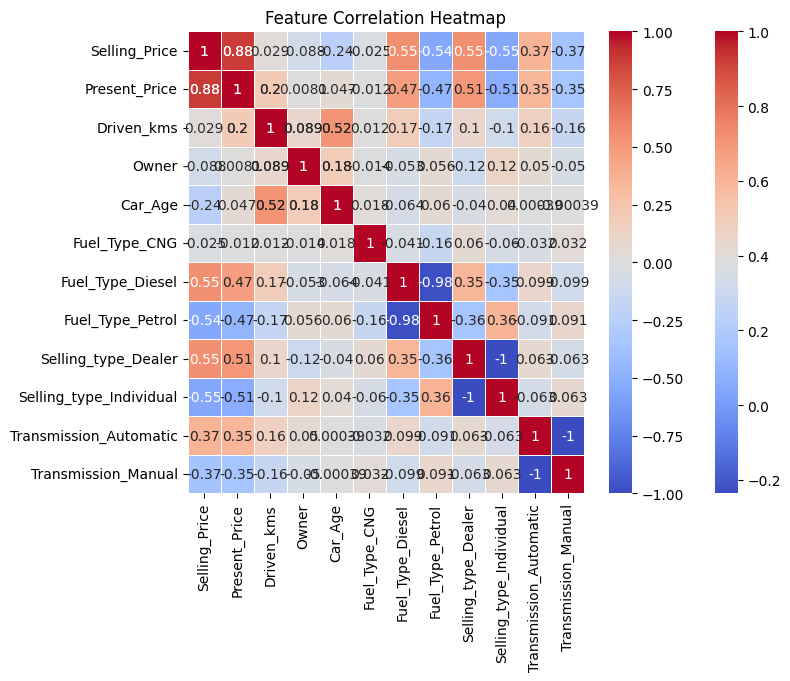

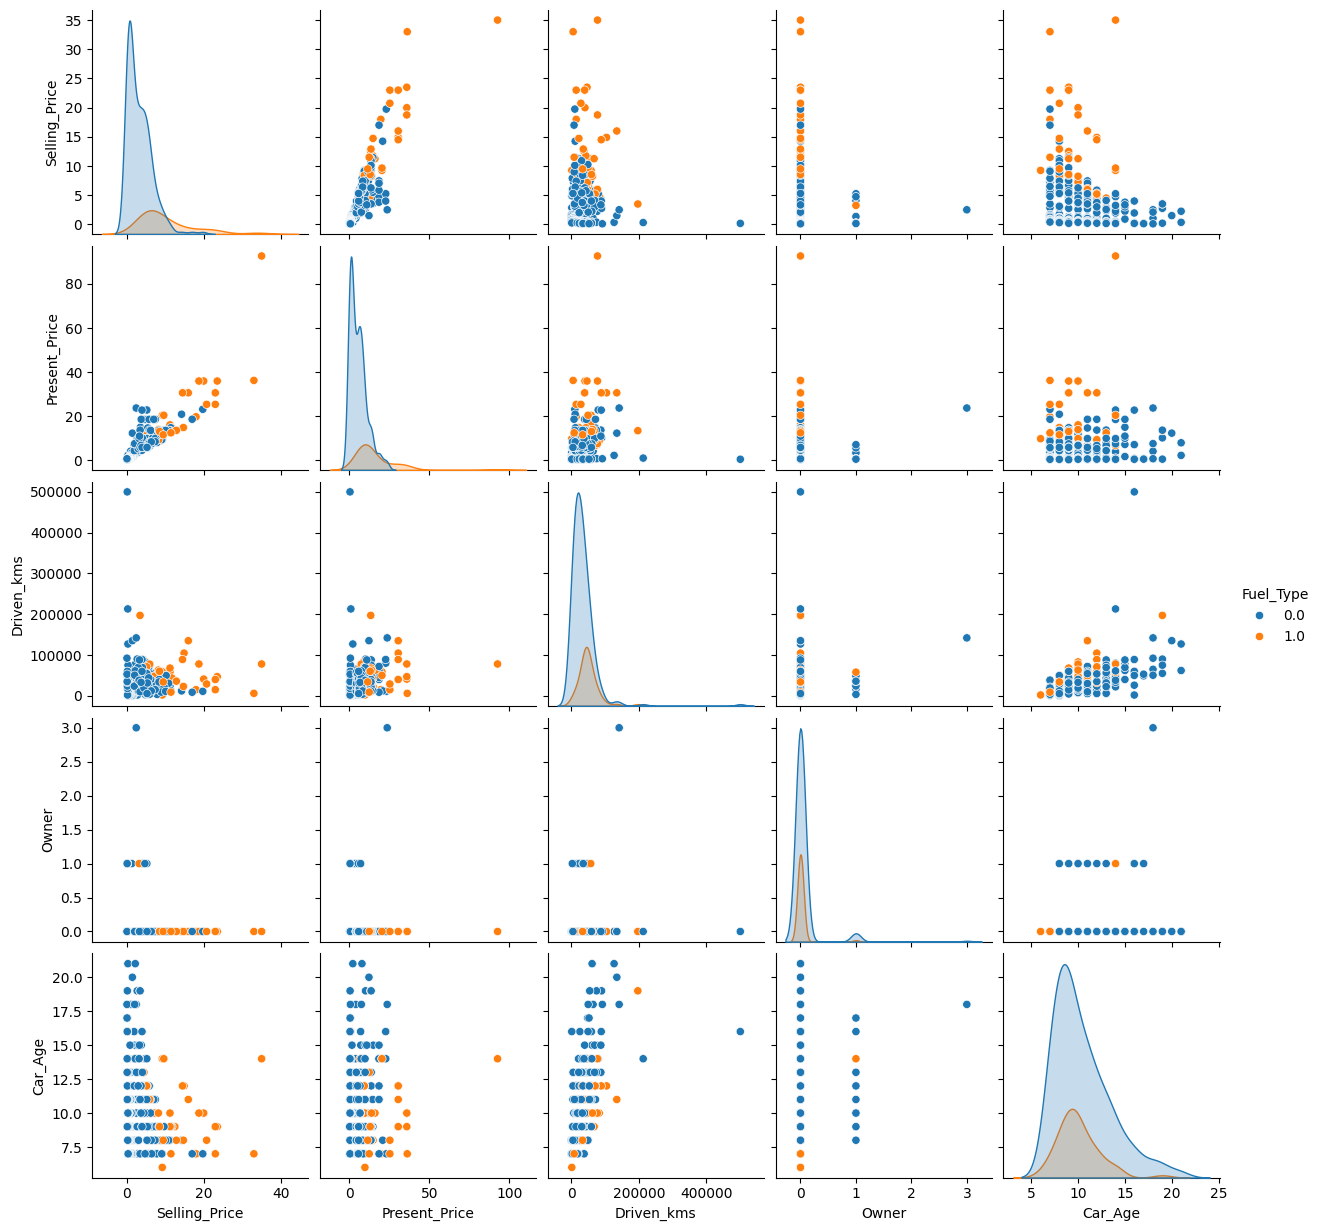


Analysis Complete! Check the visualizations for insights.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/car data.csv"
df = pd.read_csv(file_path)

# Display basic info
def dataset_overview(df):
    print("\nDataset Info:\n")
    print(df.info())
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    print("\nStatistical Summary:\n")
    print(df.describe())

dataset_overview(df)

# Convert Year to car's age
df['Car_Age'] = 2024 - df['Year']
df = df.drop(columns=['Year', 'Car_Name'])  # Drop unused columns

# Visualizing Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='blue')
plt.title('Selling Price Distribution')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Frequency')
plt.show()

# Count plot for Fuel Type
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Fuel_Type'], palette='pastel')
plt.title('Fuel Type Count')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

# Transmission vs Selling Price
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Transmission'], y=df['Selling_Price'], palette='coolwarm')
plt.title('Transmission vs Selling Price')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
print(df.dtypes)
df_numeric = df.select_dtypes(include=['number'])  # Keep only numerical columns
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded)  # One-hot encoding
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'Electric': 2})
print(df_numeric.isnull().sum())
df_numeric = df_numeric.dropna()  # Drop NaNs
# OR
df_numeric = df_numeric.fillna(df_numeric.mean())  # Replace NaNs with mean
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, hue='Fuel_Type')
plt.show()

print("\nAnalysis Complete! Check the visualizations for insights.")